# Import all modules and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

In [2]:
loan_data = pd.read_csv('accepted_2007_to_2018Q4.csv')
loan_data.shape

/Users/jjobes/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2260701, 151)

In [3]:
loan_data = loan_data.sample(n=100000, axis=0, random_state=1)
loan_data.shape

(100000, 151)

# Remove columns with < 90% data

Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types

In [4]:
# find missing values for each column


missing = pd.concat([loan_data.isnull().sum(), 100 * loan_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')


,count,%
id,0,0.000
fico_range_low,1,0.001
fico_range_high,1,0.001
hardship_flag,1,0.001
revol_bal,1,0.001
...,...,...
hardship_reason,99491,99.491
hardship_dpd,99491,99.491
hardship_loan_status,99491,99.491
orig_projected_additional_accrued_interest,99602,99.602


In [5]:
# define list of columns with a large amount of missing values

large_null_columns = missing[missing['%'] > 0.90] 
large_null_columns.reset_index(inplace=True)
large_null_columns.columns

columns_to_drop = list(large_null_columns['index'])
print(columns_to_drop)

['member_id', 'emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_pas

In [6]:
# drop these columns with more than 90% of its data missing

new_data = loan_data.drop(columns_to_drop, axis=1)
new_data.shape

(100000, 56)

In [7]:
new_data = new_data.dropna(how='any')

In [8]:
new_data.shape

(99685, 56)

# Reset Index to loan id

In [9]:
# set index to something useful

new_data.set_index('id', inplace=True)

# Split dataframe into numeric and non-numeric

Split data into numeric and non_numeric valued dataframes to review common columns easier

In [10]:
numeric_df = new_data.select_dtypes(np.number)

numeric_columns = list(numeric_df)


non_numeric_df = new_data.drop(numeric_columns, axis=1)

non_numeric_df_columns = list(non_numeric_df)

In [11]:
numeric_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
132555889,11000.0,11000.0,11000.0,10.90,359.61,36000.0,16.10,0.0,675.0,679.0,2.0,22.0,0.0,15093.0,40.1,24.0,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,0.0,0.0,0.0,359.61,669.0,665.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
69743499,12000.0,12000.0,12000.0,6.99,370.48,86000.0,19.84,0.0,685.0,689.0,1.0,19.0,0.0,10032.0,30.0,38.0,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,0.0,0.0,0.0,370.09,674.0,670.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
63590274,5000.0,5000.0,5000.0,12.05,166.20,25000.0,16.95,0.0,660.0,664.0,0.0,6.0,0.0,1312.0,30.5,10.0,0.00,0.00,5777.950141,5777.95,5000.00,777.95,0.0,0.0,0.0,2625.17,654.0,650.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42364040,20000.0,20000.0,19975.0,15.61,699.30,40000.0,34.56,0.0,705.0,709.0,0.0,10.0,0.0,40605.0,60.9,17.0,0.00,0.00,25154.877245,25123.43,20000.00,5154.88,0.0,0.0,0.0,1396.02,794.0,790.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
144254317,5000.0,5000.0,5000.0,18.94,183.13,68000.0,35.58,16.0,660.0,664.0,0.0,15.0,0.0,9301.0,80.9,42.0,4682.40,4682.40,544.130000,544.13,317.60,226.53,0.0,0.0,0.0,183.13,664.0,660.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
non_numeric_df.head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,
132555889,36 months,B,B4,RENT,Source Verified,May-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,169xx,PA,Apr-2008,w,Mar-2019,Mar-2019,Individual,N,DirectPay,N
69743499,36 months,A,A3,MORTGAGE,Not Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,773xx,TX,Apr-2000,w,Jan-2019,Mar-2019,Individual,N,Cash,N
63590274,36 months,C,C1,RENT,Source Verified,Nov-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,490xx,MI,Jul-2010,w,Jul-2017,Mar-2019,Individual,N,Cash,N
42364040,36 months,D,D1,RENT,Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,900xx,CA,Feb-1987,f,Mar-2018,Mar-2018,Individual,N,Cash,N
144254317,36 months,D,D2,RENT,Source Verified,Nov-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,330xx,FL,Apr-2001,w,Mar-2019,Mar-2019,Individual,N,Cash,N


In [13]:
numeric_df.shape

(99685, 35)

In [14]:
non_numeric_df.shape

(99685, 20)

# Review numeric dataframe

Decide whether columns will be useful for further analysis. From left to right.

The overall goal of this data is to determine whether loans will be paid off on time or not (Classification / Clustering). Anything that doesn't relate to whether this problem statement will be true will be removed.

In [15]:
numeric_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,9.968500e+04,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,9.968500e+04,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.0,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000
mean,15045.914631,15039.999498,15025.724983,13.096906,445.629975,7.776934e+04,18.873475,0.302302,698.763605,702.763806,0.577078,11.590410,0.196098,1.665884e+04,50.284476,24.163635,4213.333214,4212.424132,12075.416355,12060.929530,9495.037461,2430.199991,1.531697,148.647212,24.847312,3415.052720,687.622220,675.826353,0.018057,1.0,0.004053,0.008707,11.790029,0.128535,0.045293
std,9170.634378,9168.107597,9169.100695,4.836740,266.440799,6.962416e+04,15.689850,0.838447,33.125801,33.126689,0.882980,5.623837,0.589291,2.247153e+04,24.785208,11.976822,7322.353631,7321.398396,9882.208914,9876.885949,8299.217026,2672.656570,11.509865,776.704504,136.574041,5990.313705,72.880111,109.773950,0.147593,0.0,0.066916,0.101869,637.146816,0.366039,0.404453
min,1000.000000,1000.000000,0.000000,5.310000,29.520000,1.500000e+01,0.000000,0.000000,640.000000,644.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.490000,252.820000,4.616000e+04,11.880000,0.000000,675.000000,679.000000,0.000000,8.000000,0.000000,5.937000e+03,31.400000,15.000000,0.000000,0.000000,4548.795821,4539.660000,3000.000000,730.910000,0.000000,0.000000,0.000000,310.460000,654.000000,650.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,12975.000000,12900.000000,12.620000,378.200000,6.500000e+04,17.820000,0.000000,690.000000,694.000000,0.000000,11.000000,0.000000,1.133300e+04,50.000000,22.000000,0.000000,0.000000,9350.940000,9332.200000,7000.000000,1531.750000,0.000000,0.000000,0.000000,599.010000,699.000000,695.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,591.480000,9.350000e+04,24.460000,0.000000,715.000000,719.000000,1.000000,14.000000,0.000000,2.031000e+04,69.400000,31.000000,6202.250000,6195.780000,16907.352839,16889.230000,13850.000000,3095.790000,0.000000,0.000000,0.000000,3709.650000,734.000000,730.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,40000.000000,40000.000000,40000.000000,30.990000,1566.800000,9.522972e+06,999.000000,30.000000,845.000000,850.000000,10.000000,68.000000,63.000000,1.044210e+06,177.700000,136.000000,39091.640000,39091.640000,62253.312065,62253.310000,40000.000000,27876.770000,874.170000,36578.540000,6584.137200,41105.140000,850.000000,845.000000,7.000000,1.0,3.000000,4.000000,65000.000000,7.000000,63.000000


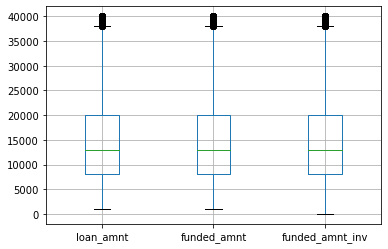

In [16]:
 boxplot = numeric_df.boxplot(column=['loan_amnt', 'funded_amnt', 'funded_amnt_inv'])

In [17]:
# all 3 of these columns are showing the same data ie how much money was provided. Keep loan_amnt and drop the others.

del numeric_df['funded_amnt_inv']
del numeric_df['funded_amnt']

In [18]:
numeric_df.describe()


,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,99685.000000,99685.000000,99685.000000,9.968500e+04,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,9.968500e+04,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000,99685.0,99685.000000,99685.000000,99685.000000,99685.000000,99685.000000
mean,15045.914631,13.096906,445.629975,7.776934e+04,18.873475,0.302302,698.763605,702.763806,0.577078,11.590410,0.196098,1.665884e+04,50.284476,24.163635,4213.333214,4212.424132,12075.416355,12060.929530,9495.037461,2430.199991,1.531697,148.647212,24.847312,3415.052720,687.622220,675.826353,0.018057,1.0,0.004053,0.008707,11.790029,0.128535,0.045293
std,9170.634378,4.836740,266.440799,6.962416e+04,15.689850,0.838447,33.125801,33.126689,0.882980,5.623837,0.589291,2.247153e+04,24.785208,11.976822,7322.353631,7321.398396,9882.208914,9876.885949,8299.217026,2672.656570,11.509865,776.704504,136.574041,5990.313705,72.880111,109.773950,0.147593,0.0,0.066916,0.101869,637.146816,0.366039,0.404453
min,1000.000000,5.310000,29.520000,1.500000e+01,0.000000,0.000000,640.000000,644.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,9.490000,252.820000,4.616000e+04,11.880000,0.000000,675.000000,679.000000,0.000000,8.000000,0.000000,5.937000e+03,31.400000,15.000000,0.000000,0.000000,4548.795821,4539.660000,3000.000000,730.910000,0.000000,0.000000,0.000000,310.460000,654.000000,650.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,12.620000,378.200000,6.500000e+04,17.820000,0.000000,690.000000,694.000000,0.000000,11.000000,0.000000,1.133300e+04,50.000000,22.000000,0.000000,0.000000,9350.940000,9332.200000,7000.000000,1531.750000,0.000000,0.000000,0.000000,599.010000,699.000000,695.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,15.990000,591.480000,9.350000e+04,24.460000,0.000000,715.000000,719.000000,1.000000,14.000000,0.000000,2.031000e+04,69.400000,31.000000,6202.250000,6195.780000,16907.352839,16889.230000,13850.000000,3095.790000,0.000000,0.000000,0.000000,3709.650000,734.000000,730.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,40000.000000,30.990000,1566.800000,9.522972e+06,999.000000,30.000000,845.000000,850.000000,10.000000,68.000000,63.000000,1.044210e+06,177.700000,136.000000,39091.640000,39091.640000,62253.312065,62253.310000,40000.000000,27876.770000,874.170000,36578.540000,6584.137200,41105.140000,850.000000,845.000000,7.000000,1.0,3.000000,4.000000,65000.000000,7.000000,63.000000


In [19]:
# int_rate, installment, income, dti, delinq_2yrs are all keepers 

# dti - Debt to income minus current loan amonut excluding mortgage

# int_rate - loan interest rate

# delinq_2yrs - the number of accounts on which the borrower is now delinquent over 2 years

(400.0, 900.0)

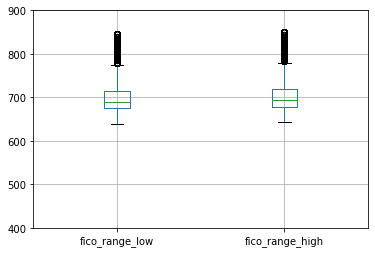

In [20]:
# fico_range_high - the upper boundary range the borrower’s FICO at loan origination belongs to.
# fico_range_low - the lower boundary range the borrower’s FICO at loan origination belongs to.

boxplot = numeric_df.boxplot(column=['fico_range_low', 'fico_range_high'])
plt.ylim(400, 900)

In [21]:
# this shows the same information. maybe the difference between the 2 will yeild information.

numeric_df['fico_range'] = numeric_df['fico_range_high'] - numeric_df['fico_range_low']
numeric_df['fico_range'].value_counts()

<ipython-input-21-05d522fbdfd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['fico_range'] = numeric_df['fico_range_high'] - numeric_df['fico_range_low']


4.0    99665
5.0       20
Name: fico_range, dtype: int64

In [22]:
# Nope. a difference of 4 or 5 won't make a difference. I'll keep the high and move on.

del numeric_df['fico_range_low']
del numeric_df['fico_range']

(400.0, 900.0)

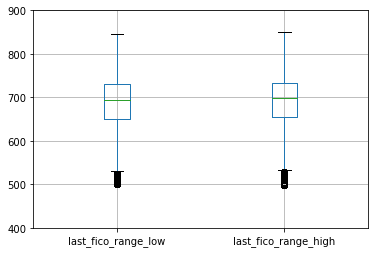

In [23]:
# lets deal with all fico related columns now then we'll return to inq_last_6mnths

# last_fico_range_high - the upper boundary range the borrower’s last FICO pulled belongs to.
# last_fico_range_low - the lower boundary range the borrower’s last FICO pulled belongs to.

# larger 75% quartile from last boxplot likely due to a variation of the last time the fico was pulled (yesterday vs 10 years ago)

boxplot = numeric_df.boxplot(column=['last_fico_range_low', 'last_fico_range_high'])
plt.ylim(400, 900)

In [24]:
numeric_df['last_fico_range'] = numeric_df['last_fico_range_high'] - numeric_df['last_fico_range_low']
numeric_df['last_fico_range'].value_counts()

<ipython-input-24-69f708173da0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['last_fico_range'] = numeric_df['last_fico_range_high'] - numeric_df['last_fico_range_low']


4.0      98089
499.0     1570
5.0         17
0.0          9
Name: last_fico_range, dtype: int64

In [25]:
# both these columns are mostly the same. 
# there are some with a large difference from low to high which may provide insight on a drop in fico. 
# I already have the last fico score so I'll just keep the that and last_fico_range
# I'll keep the high and add a column to show the difference (more telling)

del numeric_df['last_fico_range_low']
del numeric_df['last_fico_range_high']

In [26]:
numeric_df.shape

(99685, 31)

In [27]:
# now back to inq_last_6mths

numeric_df.head(5)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
132555889,11000.0,10.90,359.61,36000.0,16.10,0.0,679.0,2.0,22.0,0.0,15093.0,40.1,24.0,8294.29,8294.29,3613.580000,3613.58,2705.71,907.87,0.0,0.0,0.0,359.61,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
69743499,12000.0,6.99,370.48,86000.0,19.84,0.0,689.0,1.0,19.0,0.0,10032.0,30.0,38.0,0.00,0.00,13334.562695,13334.56,12000.00,1334.56,0.0,0.0,0.0,370.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
63590274,5000.0,12.05,166.20,25000.0,16.95,0.0,664.0,0.0,6.0,0.0,1312.0,30.5,10.0,0.00,0.00,5777.950141,5777.95,5000.00,777.95,0.0,0.0,0.0,2625.17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
42364040,20000.0,15.61,699.30,40000.0,34.56,0.0,709.0,0.0,10.0,0.0,40605.0,60.9,17.0,0.00,0.00,25154.877245,25123.43,20000.00,5154.88,0.0,0.0,0.0,1396.02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
144254317,5000.0,18.94,183.13,68000.0,35.58,16.0,664.0,0.0,15.0,0.0,9301.0,80.9,42.0,4682.40,4682.40,544.130000,544.13,317.60,226.53,0.0,0.0,0.0,183.13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [28]:
# inq_last_6mths - the number of inquiries in past 6 months (excluding auto and mortgage inquiries)
# this could be a negative sign. definitely keep.

# open_acc - the number of open credit lines in the borrower’s credit file.
# this could be a negative sign. definitely keep.

# pub_rec - number of derogatory public records
# this could be a negative sign. definitely keep.

# revol_bal - total credit owed to lender a the time of inquiry

# revol_util - % of credit limit used. This is a better look at overall health vs absolute value (revol_bal). 
# Let's remove revol_bal and keep revol_util 

del numeric_df['revol_bal']

# total_acc - the total number of credit lines currently in the borrower’s credit file
# this goes hand in hand with open_acc. Keep. 

# out_prncp - remaining outstanding principal for total amount funded for current loans being filled. This 
# this doesnt help us because we dont have an answer on the loan. Remove.

del numeric_df['out_prncp']

# out_prncp_inv - remaining outstanding principal for portion of total amount funded by investors
# same as out_prncp. remove. 

del numeric_df['out_prncp_inv']

# total_pymnt	Payments received to date for total amount funded
# same as above. Remove.

del numeric_df['total_pymnt']

# total_rec_int	Interest received to date
# same as above. Remove.

del numeric_df['total_rec_int']

# total_rec_prncp	Principal received to date
# same as above. Remove.

del numeric_df['total_rec_prncp']

# total_rec_late_fee	Late fees received to date
# same as above. Remove.

del numeric_df['total_rec_late_fee']

# recoveries	post charge off gross recovery
# same as above. Remove.

del numeric_df['recoveries']

# collection_recovery_fee	post charge off collection fee
# same as above. Remove.

del numeric_df['collection_recovery_fee']

# collections_12_mths_ex_med	Number of collections in 12 months excluding medical collections
# this could be a negative sign. definitely keep.


# policy_code	publicly available policy_code=1 - new products not publicly available policy_code=2
# need to investigate before keeping/removing


# acc_now_delinq	The number of accounts on which the borrower is now delinquent.
# this could be a negative sign. definitely keep.

# chargeoff_within_12_mths	Number of charge-offs within 12 months
# this could be a negative sign. definitely keep.


# pub_rec_bankruptcies	Number of public record bankruptcies
# this could be a negative sign. definitely keep.

# tax_liens	Number of tax liens
# this could be a negative sign. definitely keep.


In [29]:
numeric_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
id,,,,,,,,,,,,,,,,,,,,,,
132555889,11000.0,10.90,359.61,36000.0,16.10,0.0,679.0,2.0,22.0,0.0,40.1,24.0,3613.58,359.61,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
69743499,12000.0,6.99,370.48,86000.0,19.84,0.0,689.0,1.0,19.0,0.0,30.0,38.0,13334.56,370.09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
63590274,5000.0,12.05,166.20,25000.0,16.95,0.0,664.0,0.0,6.0,0.0,30.5,10.0,5777.95,2625.17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
42364040,20000.0,15.61,699.30,40000.0,34.56,0.0,709.0,0.0,10.0,0.0,60.9,17.0,25123.43,1396.02,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
144254317,5000.0,18.94,183.13,68000.0,35.58,16.0,664.0,0.0,15.0,0.0,80.9,42.0,544.13,183.13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


In [30]:
# missed total_pymnt_inv and last_pymnt_amnt. Both are about current loans, not with a final answer on the loan
# we need. Delete.

del numeric_df['total_pymnt_inv']
del numeric_df['last_pymnt_amnt']


In [31]:
# policy_code	publicly available policy_code=1 - new products not publicly available policy_code=2


numeric_df['policy_code'].value_counts()

1.0    99685
Name: policy_code, dtype: int64

In [32]:
# all the same. Remove column.

del numeric_df['policy_code']

In [33]:
numeric_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
id,,,,,,,,,,,,,,,,,,,
132555889,11000.0,10.90,359.61,36000.0,16.10,0.0,679.0,2.0,22.0,0.0,40.1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
69743499,12000.0,6.99,370.48,86000.0,19.84,0.0,689.0,1.0,19.0,0.0,30.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
63590274,5000.0,12.05,166.20,25000.0,16.95,0.0,664.0,0.0,6.0,0.0,30.5,10.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
42364040,20000.0,15.61,699.30,40000.0,34.56,0.0,709.0,0.0,10.0,0.0,60.9,17.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
144254317,5000.0,18.94,183.13,68000.0,35.58,16.0,664.0,0.0,15.0,0.0,80.9,42.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [34]:
# all these columns give us information on the financial status of each member for loans already completed. 
# we are good to go. 


numeric_df.shape

(99685, 19)

In [35]:
numeric_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
loan_amnt,1.000000,0.095000,0.945167,0.315965,0.040003,-0.014438,0.113594,-0.024878,0.182091,-0.059046,0.095336,0.194428,-0.017591,-0.002255,0.000534,-0.001077,-0.084687,0.004204,-0.025884
int_rate,0.095000,1.000000,0.120988,-0.079191,0.108803,0.065006,-0.414117,0.189869,-0.007472,0.054162,0.259733,-0.038308,0.020995,0.013800,0.014934,0.002524,0.056877,0.016456,0.071775
installment,0.945167,0.120988,1.000000,0.305858,0.041873,-0.001072,0.054835,0.000388,0.171436,-0.045401,0.117229,0.173841,-0.012699,0.001465,0.002030,-0.000589,-0.075312,0.012342,-0.018668
annual_inc,0.315965,-0.079191,0.305858,1.000000,-0.121270,0.039201,0.061125,0.032464,0.151932,-0.008374,0.046624,0.183668,-0.005798,0.012722,0.005851,0.001448,-0.042677,0.029135,-0.023963
dti,0.040003,0.108803,0.041873,-0.121270,1.000000,-0.007414,-0.020320,-0.012440,0.166979,-0.022015,0.096865,0.130126,-0.006554,-0.000296,-0.000662,-0.002215,-0.009401,-0.017821,-0.005437
delinq_2yrs,-0.014438,0.065006,-0.001072,0.039201,-0.007414,1.000000,-0.183477,0.026013,0.043252,-0.021103,0.005619,0.112053,0.062003,0.114230,0.128445,0.028192,-0.049501,0.010091,-0.012553
fico_range_high,0.113594,-0.414117,0.054835,0.061125,-0.020320,-0.183477,1.000000,-0.095306,0.017657,-0.183079,-0.476179,0.010026,-0.075792,-0.036478,-0.055299,-0.012370,-0.195267,-0.056585,-0.054085
inq_last_6mths,-0.024878,0.189869,0.000388,0.032464,-0.012440,0.026013,-0.095306,1.000000,0.138977,0.066809,-0.078467,0.159889,0.017725,0.000316,0.010048,0.000586,0.078244,0.014593,0.030929
open_acc,0.182091,-0.007472,0.171436,0.151932,0.166979,0.043252,0.017657,0.138977,1.000000,-0.016005,-0.126152,0.714243,0.005575,0.021765,0.009027,0.003717,-0.016958,-0.007505,-0.027510
pub_rec,-0.059046,0.054162,-0.045401,-0.008374,-0.022015,-0.021103,-0.183079,0.066809,-0.016005,1.000000,-0.056363,0.003173,0.014536,-0.000311,-0.004380,0.004490,0.643256,0.719635,0.020117


# Review non-numeric dataframe

Decide whether columns will be useful for further analysis. From left to right.

The overall goal of this data is to determine whether loans will be paid off on time or not (Classification / Clustering). Anything that doesn't relate to whether this problem statement will be true will be removed.

Also, if catagorical, make numeric for further analysis. 

In [36]:
non_numeric_df.head()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,,,,,,,
132555889,36 months,B,B4,RENT,Source Verified,May-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,169xx,PA,Apr-2008,w,Mar-2019,Mar-2019,Individual,N,DirectPay,N
69743499,36 months,A,A3,MORTGAGE,Not Verified,Jan-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,773xx,TX,Apr-2000,w,Jan-2019,Mar-2019,Individual,N,Cash,N
63590274,36 months,C,C1,RENT,Source Verified,Nov-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,490xx,MI,Jul-2010,w,Jul-2017,Mar-2019,Individual,N,Cash,N
42364040,36 months,D,D1,RENT,Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,900xx,CA,Feb-1987,f,Mar-2018,Mar-2018,Individual,N,Cash,N
144254317,36 months,D,D2,RENT,Source Verified,Nov-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,330xx,FL,Apr-2001,w,Mar-2019,Mar-2019,Individual,N,Cash,N


In [37]:
# term - length of loan
# keep. there may be a correlation

# grade and sub-grade - 'quality' of loan caluclated by the bank. This is just used to calculate the interest
# rate. Remove both. 

del non_numeric_df['grade']
del non_numeric_df['sub_grade']

# home ownership - there may be a correlation. investigate the value counts and make numeric.

# verification_status - whether there application is verfied. definitely keep and make numeric.

# date issue_d - this may correlate to a bad timing in the market ie. 2008-2009. Keep and add avg 
# dow jones value into dataset for each month

# loan_status - keep to filter out current loans with end result

# pymnt_plan - investigate

# url - remove
del non_numeric_df['url']

# purpose - may be correlation. Keep and make numeric. 

# zip code - maybe correlate to low poverty areas... talk with tony
# addr_state - maybe correlate to low poverty areas... talk with tony

# earliest_cr_line - this is taken into account for fico score so remove
del non_numeric_df['earliest_cr_line']

# initial_list_status - need to investigate

# last_pymnt_d - doesnt matter for loans already closed. remove. 
del non_numeric_df['last_pymnt_d']

# last_credit_pull_d - taken into account with fico. remove. 
del non_numeric_df['last_credit_pull_d']

# application_type - keep. May be a correlation

# hardship_flag - keep. invetigate. 

# disbursement_method - investigate

# debt_settlement_flag - keep

In [38]:
non_numeric_df.head()

,term,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,
132555889,36 months,RENT,Source Verified,May-2018,Current,n,credit_card,169xx,PA,w,Individual,N,DirectPay,N
69743499,36 months,MORTGAGE,Not Verified,Jan-2016,Fully Paid,n,debt_consolidation,773xx,TX,w,Individual,N,Cash,N
63590274,36 months,RENT,Source Verified,Nov-2015,Fully Paid,n,debt_consolidation,490xx,MI,w,Individual,N,Cash,N
42364040,36 months,RENT,Verified,Apr-2015,Fully Paid,n,credit_card,900xx,CA,f,Individual,N,Cash,N
144254317,36 months,RENT,Source Verified,Nov-2018,Current,n,debt_consolidation,330xx,FL,w,Individual,N,Cash,N


In [39]:
non_numeric_df['term'].value_counts()

 36 months    70876
 60 months    28809
Name: term, dtype: int64

In [40]:
# convert to numeric with 0--> 36 months and 1--> 60 months

non_numeric_df.loc[non_numeric_df.term == ' 36 months', 'term'] = 0
non_numeric_df.loc[non_numeric_df.term == ' 60 months', 'term'] = 1

In [41]:
non_numeric_df.head()

,term,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,
132555889,0,RENT,Source Verified,May-2018,Current,n,credit_card,169xx,PA,w,Individual,N,DirectPay,N
69743499,0,MORTGAGE,Not Verified,Jan-2016,Fully Paid,n,debt_consolidation,773xx,TX,w,Individual,N,Cash,N
63590274,0,RENT,Source Verified,Nov-2015,Fully Paid,n,debt_consolidation,490xx,MI,w,Individual,N,Cash,N
42364040,0,RENT,Verified,Apr-2015,Fully Paid,n,credit_card,900xx,CA,f,Individual,N,Cash,N
144254317,0,RENT,Source Verified,Nov-2018,Current,n,debt_consolidation,330xx,FL,w,Individual,N,Cash,N


In [42]:
non_numeric_df['home_ownership'].value_counts()

MORTGAGE    49321
RENT        39385
OWN         10932
ANY            36
OTHER           9
NONE            2
Name: home_ownership, dtype: int64

In [43]:
# MORTGAGE --> 0
# RENT     --> 1
# OWN      --> 2
# ANY      --> 3
# OTHER    --> 4
# NONE     --> 5

non_numeric_df.loc[non_numeric_df.home_ownership == 'MORTGAGE', 'home_ownership'] = 0
non_numeric_df.loc[non_numeric_df.home_ownership == 'RENT', 'home_ownership'] = 1
non_numeric_df.loc[non_numeric_df.home_ownership == 'OWN', 'home_ownership'] = 2
non_numeric_df.loc[non_numeric_df.home_ownership == 'ANY', 'home_ownership'] = 3
non_numeric_df.loc[non_numeric_df.home_ownership == 'OTHER', 'home_ownership'] = 4
non_numeric_df.loc[non_numeric_df.home_ownership == 'NONE', 'home_ownership'] = 5

In [44]:
non_numeric_df.head()

,term,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method,debt_settlement_flag
id,,,,,,,,,,,,,,
132555889,0,1,Source Verified,May-2018,Current,n,credit_card,169xx,PA,w,Individual,N,DirectPay,N
69743499,0,0,Not Verified,Jan-2016,Fully Paid,n,debt_consolidation,773xx,TX,w,Individual,N,Cash,N
63590274,0,1,Source Verified,Nov-2015,Fully Paid,n,debt_consolidation,490xx,MI,w,Individual,N,Cash,N
42364040,0,1,Verified,Apr-2015,Fully Paid,n,credit_card,900xx,CA,f,Individual,N,Cash,N
144254317,0,1,Source Verified,Nov-2018,Current,n,debt_consolidation,330xx,FL,w,Individual,N,Cash,N


In [45]:
non_numeric_df['verification_status'].value_counts()

Source Verified    39029
Not Verified       32784
Verified           27872
Name: verification_status, dtype: int64

In [46]:
# Source Verified  --> 0
# Not Verified     --> 1
# Verified         --> 2

non_numeric_df.loc[non_numeric_df.verification_status == 'Source Verified', 'verification_status'] = 0
non_numeric_df.loc[non_numeric_df.verification_status == 'Not Verified', 'verification_status'] = 1
non_numeric_df.loc[non_numeric_df.verification_status == 'Verified', 'verification_status'] = 2

In [47]:
non_numeric_df['pymnt_plan'].value_counts()

n    99663
y       22
Name: pymnt_plan, dtype: int64

In [48]:
# this looks like if the payments were late they went on a payment plan. I'll remove since this is already covered
# by grouping loans if they were late or not. 

del non_numeric_df['pymnt_plan']

In [49]:
non_numeric_df['purpose'].value_counts()

debt_consolidation    56382
credit_card           22903
home_improvement       6526
other                  6248
major_purchase         2111
medical                1209
small_business         1122
car                    1063
vacation                715
moving                  653
house                   593
wedding                  88
renewable_energy         58
educational              14
Name: purpose, dtype: int64

In [50]:
# the reason why loans are pulled are independent of whether a loan is good or not for the bank. If the bank 
# knows they'll make money they hand out loans. I'll remove. 

del non_numeric_df['purpose']

In [51]:
non_numeric_df['initial_list_status'].value_counts()

w    67814
f    31871
Name: initial_list_status, dtype: int64

In [52]:
# no value here. remove. 

del non_numeric_df['initial_list_status']

In [53]:
non_numeric_df['application_type'].value_counts()

Individual    94427
Joint App      5258
Name: application_type, dtype: int64

In [54]:
# Individual --> 0
# Joint App  --> 1

non_numeric_df.loc[non_numeric_df.application_type == 'Individual', 'application_type'] = 0
non_numeric_df.loc[non_numeric_df.application_type == 'Joint App', 'application_type'] = 1

In [55]:
non_numeric_df['application_type'].value_counts()

0    94427
1     5258
Name: application_type, dtype: int64

In [56]:
non_numeric_df['hardship_flag'].value_counts()

N    99654
Y       31
Name: hardship_flag, dtype: int64

In [57]:
# N  --> 0
# Y  --> 1

non_numeric_df.loc[non_numeric_df.hardship_flag == 'N', 'hardship_flag'] = 0
non_numeric_df.loc[non_numeric_df.hardship_flag == 'Y', 'hardship_flag'] = 1

In [58]:
non_numeric_df['disbursement_method'].value_counts()

# this likely doesnt have any correlation to success do remove

del non_numeric_df['disbursement_method']

In [59]:
non_numeric_df['debt_settlement_flag'].value_counts() 

N    98196
Y     1489
Name: debt_settlement_flag, dtype: int64

In [60]:
# N  --> 0
# Y  --> 1

non_numeric_df.loc[non_numeric_df.debt_settlement_flag == 'N', 'debt_settlement_flag'] = 0
non_numeric_df.loc[non_numeric_df.debt_settlement_flag == 'Y', 'debt_settlement_flag'] = 1

In [61]:
# loan_status will be used to remove current loans vs completed loans. I'll do this later.

In [62]:
# talk to tony about dates an correlation to economy at that time with DowJones monthly average

In [63]:
non_numeric_df.head()

,term,home_ownership,verification_status,issue_d,loan_status,zip_code,addr_state,application_type,hardship_flag,debt_settlement_flag
id,,,,,,,,,,
132555889,0,1,0,May-2018,Current,169xx,PA,0,0,0
69743499,0,0,1,Jan-2016,Fully Paid,773xx,TX,0,0,0
63590274,0,1,0,Nov-2015,Fully Paid,490xx,MI,0,0,0
42364040,0,1,2,Apr-2015,Fully Paid,900xx,CA,0,0,0
144254317,0,1,0,Nov-2018,Current,330xx,FL,0,0,0


In [64]:
# let's assume state has no bearing on loan success. Tony? What do you think?

# if it does - what would be an efficient code to automate this numeric allocation besides manual like I did above?

del non_numeric_df['zip_code']
del non_numeric_df['addr_state']

In [65]:
non_numeric_df.head()

,term,home_ownership,verification_status,issue_d,loan_status,application_type,hardship_flag,debt_settlement_flag
id,,,,,,,,
132555889,0,1,0,May-2018,Current,0,0,0
69743499,0,0,1,Jan-2016,Fully Paid,0,0,0
63590274,0,1,0,Nov-2015,Fully Paid,0,0,0
42364040,0,1,2,Apr-2015,Fully Paid,0,0,0
144254317,0,1,0,Nov-2018,Current,0,0,0


# Combine numeric and non_numeric data

In [66]:
non_numeric_df.shape

(99685, 8)

In [67]:
numeric_df.shape

(99685, 19)

In [68]:
result = pd.merge(non_numeric_df, numeric_df, left_index=True, right_index=True, how='outer')

In [69]:
result.shape

(99685, 27)

In [70]:
result.head()

,term,home_ownership,verification_status,issue_d,loan_status,application_type,hardship_flag,debt_settlement_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
132555889,0,1,0,May-2018,Current,0,0,0,11000.0,10.90,359.61,36000.0,16.10,0.0,679.0,2.0,22.0,0.0,40.1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
69743499,0,0,1,Jan-2016,Fully Paid,0,0,0,12000.0,6.99,370.48,86000.0,19.84,0.0,689.0,1.0,19.0,0.0,30.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
63590274,0,1,0,Nov-2015,Fully Paid,0,0,0,5000.0,12.05,166.20,25000.0,16.95,0.0,664.0,0.0,6.0,0.0,30.5,10.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
42364040,0,1,2,Apr-2015,Fully Paid,0,0,0,20000.0,15.61,699.30,40000.0,34.56,0.0,709.0,0.0,10.0,0.0,60.9,17.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
144254317,0,1,0,Nov-2018,Current,0,0,0,5000.0,18.94,183.13,68000.0,35.58,16.0,664.0,0.0,15.0,0.0,80.9,42.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [74]:
# some of these need to be set to numeric

result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99685 entries, 132555889 to 4275474
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   term                        99685 non-null  object 
 1   home_ownership              99685 non-null  object 
 2   verification_status         99685 non-null  object 
 3   issue_d                     99685 non-null  object 
 4   loan_status                 99685 non-null  object 
 5   application_type            99685 non-null  object 
 6   hardship_flag               99685 non-null  object 
 7   debt_settlement_flag        99685 non-null  object 
 8   loan_amnt                   99685 non-null  float64
 9   int_rate                    99685 non-null  float64
 10  installment                 99685 non-null  float64
 11  annual_inc                  99685 non-null  float64
 12  dti                         99685 non-null  float64
 13  delinq_2yrs               

In [79]:
cols = ['term', 'home_ownership', 'verification_status', 'application_type', 'hardship_flag', 'debt_settlement_flag', 'annual_inc', 'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'collections_12_mths_ex_med', 'acc_now_delinq', 'pub_rec_bankruptcies', 'tax_liens', 'last_fico_range']
result[cols] = result[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [80]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99685 entries, 132555889 to 4275474
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   term                        99685 non-null  float64
 1   home_ownership              99685 non-null  float64
 2   verification_status         99685 non-null  float64
 3   issue_d                     99685 non-null  object 
 4   loan_status                 99685 non-null  object 
 5   application_type            99685 non-null  float64
 6   hardship_flag               99685 non-null  float64
 7   debt_settlement_flag        99685 non-null  float64
 8   loan_amnt                   99685 non-null  float64
 9   int_rate                    99685 non-null  float64
 10  installment                 99685 non-null  float64
 11  annual_inc                  99685 non-null  float64
 12  dti                         99685 non-null  float64
 13  delinq_2yrs               

In [81]:
result.head()

,term,home_ownership,verification_status,issue_d,loan_status,application_type,hardship_flag,debt_settlement_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
132555889,0.0,1.0,0.0,May-2018,Current,0.0,0.0,0.0,11000.0,10.90,359.61,36000.0,16.10,0.0,679.0,2.0,22.0,0.0,40.1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
69743499,0.0,0.0,1.0,Jan-2016,Fully Paid,0.0,0.0,0.0,12000.0,6.99,370.48,86000.0,19.84,0.0,689.0,1.0,19.0,0.0,30.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
63590274,0.0,1.0,0.0,Nov-2015,Fully Paid,0.0,0.0,0.0,5000.0,12.05,166.20,25000.0,16.95,0.0,664.0,0.0,6.0,0.0,30.5,10.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
42364040,0.0,1.0,2.0,Apr-2015,Fully Paid,0.0,0.0,0.0,20000.0,15.61,699.30,40000.0,34.56,0.0,709.0,0.0,10.0,0.0,60.9,17.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
144254317,0.0,1.0,0.0,Nov-2018,Current,0.0,0.0,0.0,5000.0,18.94,183.13,68000.0,35.58,16.0,664.0,0.0,15.0,0.0,80.9,42.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [82]:
# all columns have the same data type, non-null values, indexed correctly, and no columns showing duplicate or
# similar information. All have a unique value add. 

# Tony - any suggestions? I feel like I cheated by just removing all null values but due to only losing out 
# on .03% of the data I don't think its a big deal.

len(result) / len(loan_data)

0.99685

In [83]:
result.to_csv('wrangled_data.csv')

In [85]:
result.shape

(99685, 27)